# **Chap 1：机器学习理论概述**

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## **0 前言**

### **0.1 图书推荐**

推荐两本中文课程和一本英文课程，它们涵盖了大部分基础和主流的机器学习理论和方法，并对机器学习中各种问题进行了深入浅出地讨论，推荐指数从高到低排序：
* An Introduction to Statistical Learning, Robert Tibshirani
* 《统计学习方法》，李航
* 《机器学习》，周志华

<img src="./source/Chap1/book.png" style="width: 800px" align="left"/>

### **0.2 目标**

课程的以理论和实践相结合，主要包含以下内容：
* 机器学习概念、理论框架、方法论的建立，特别是针对不同问题选择不同模型、并进行正确模型性能评估
* 介绍最核心的几类机器学习方法，核心为有监督学习方法
    * 经典统计的回归类方法及其变种
    * 贝叶斯方法及其变种
    * 树模型及其变种
    * 感知机、支持向量机及其变种
    * K邻近及其变种
    * Bagging和Boosting类型方法
* 能够在编程上正确使用机器学习算法
    * 对于复杂的算法，学习调用已有的软件包
    * 对于简单的算法，最好能够自己动手实现
* 需要掌握面对实际数据时使用机器学习建模的流程和方法
    * 数据预处理
    * 特征探索和特征性选择
    * 模型构建、模型选择
    * 模型性能的评估

----

## **1 机器学习背景**

### **1.1 机器学习概念**

机器学习时从**人工智能**中产生的一个重要学科分支，是实现智能化的关键，机器学习是人工智能中的一步，属于程序范畴。机器学习又包含了众多分支和方法，从整体上，我们可以将它们划分为**统计学习方法**、**深度学习方法**和**强化学习方法**。三个方法之间又有相互交叉、相互补充的部分。

人工只能、机器学习以及统计学习方法、深度学习方法、强化学习方法的关系可以简单概括如下

<img src="./source/Chap1/机器学习结构.png" style="width: 400px" align="left"/>

本课程的关注重点主要在机器学习问题中的**统计学习方法**

从符号系统上，我们可以将机器学习任务定义规范化：

**机器学习的定义**：设 $P$ 是一个评估函数，它用于评估计算程序在某个任务 $T$ 上的性能，若一个程序能够通过利用经验 $E$， 使其在 $T$ 上的任务获得改善，则称关于 $T$ 和 $P$，该程序对 $E$ 进行了学习

注意三个符号所代表的含义：
* 任务 $T$：Task
* 性能目标 $P$：Performance Measurement
* 训练经验 $E$：Experience

以围棋AI为例，任务 $T$ 表示下围棋，性能目标 $P$ 可以定义为比赛获胜，经验 $E$ 可以是历史对战的棋局、棋谱或者和自己对弈

机器学习研究的对象是**数据**，即从数据出发，提取数据的特征或者规律，抽象出**数据模型**，利用学习得到的模型对新数据进行**预测**或者**分析**

**统计学习**是与**机器学习**高度重叠的学科，因为机器学习中大多数方法来自统计学，统计学的发展促进了机器学习的繁荣，二者的区别主要在以下几个方面：
* 统计学习重点关注统计模型的发展与优化、模型的稳定性，偏重数学，更多由**模型驱动**
* 机器学习更关注能否解决问题，偏重实践，因此机器学习研究会重点关注学习算法在计算机上的执行效率与准确性的提升，更多由**算法驱动**
* 统计学为机器学习提供理论支撑和方法指导

### **1.2 机器学习应用**

机器学习的应用范围非常广泛，可以说只要有数据的地方就可以进行机器学习，并且从不同维度能将机器学习问题分为不同种类

例如，我们可以将机器学习应用简单分为**分类**、**回归**、**推荐**、**人机交互**四大类

**(1) 分类**

当任务的目标是进行判别类别，或者说目标空间是**离散空间**时，所处理的问题就可以视为分类问题，一些经典的例子包括：

* 手写数字识别（数字0至9的10分类问题）
* 不同动物图像识别和分类（多分类问题，分类数量与动物种类有关）
* 癌症患病预测（0，1二分类问题）
* 垃圾邮件分类问题（0，1二分类问题）
* 通过外观、拍打，纹路判断一个西瓜甜不甜（0，1二分类问题）

**(2) 回归**

当任务的目标是预测某一个数值，或者说目标空间是**连续空间**时，所处理的问题可以视为回归问题，一些经典的例子包括：

* 房价预测问题
* 气温、降雨量预测问题
* GDP预测问题
* 春运、或节假日的人流量预测

**(3) 推荐**

**推荐**问题随着流媒体和互联网时代的到来被单独视为一类机器学习任务，在处理**推荐**问题时，其实可以转换为**回归**或**分类**问题，一些经典的推荐场景为：

* 淘宝首页商品推荐排序
* 微博热榜、百度搜索的推荐排序
* 抖音、小红书、今日头条的智能推荐
* 电子竞技游戏中的匹配机制

**(4) 人机交互**

**人机交互**类问题没有明确的任务目标，但也是人们备受关注的问题之一，目前这一领域主要使用**深度学习**和**强化学习**方法，不是本课程的重点，一些经典的例子包括：

* 自然语言处理（**NLP**）领域
    * AI对话，尤其是多轮对话
    * AI作画、作曲、语音合成
    * 翻译
* 图像（**CV**）领域
    * 目标检测
    * 语义分割
    * 图像生成
    * 自动驾驶
* 强化学习方法
    * 棋类AI
    * 游戏AI

----

## **2 机器学习问题分类**

根据经验数据，即训练数据或历史数据是否有标注（**Label**）以及标注的类型，机器学习可以分为：
* 有监督学习（Supervised Learning）
* 无监督学习（Unsupervised Learning）
* 强化学习（RainForcement Learning）

### **2.1 有监督学习**

有监督学习对应**标注已知，即Label已知**的情形，其问题的流程如下：
* 在典型场景中，我们感兴趣的**结果**（$y$变量），通常是**定量的**（可以是**离散**的，对应**分类**问题；也可以是**连续**的；对应**回归**问题），我们希望根据一些**输入 / 特征**（$X$变量）来**预测结果**
* 现在，我们收集了历史上的多个输入与输出样例，构成样本对 $\{(X_i,y_i)\}$，这又被称为**训练数据集**或**经验数据集**
* 使用**训练数据集**，我们能够**建立 / 训练**一个从输入空间 $X$ 到输出空间 $y$ 的**规则 / 映射** $f$，称为**预测模型**
* 通过**规则** $f$，当给定**新的输入特征**时（即从未见过的样本），我们能够**预测看不见的输出**

我们用垃圾邮件分类问题进行说明：
* 我们收集**历史的邮件数据**，特征 $X_i$ 即第 $i$ 封邮件的文本信息，然后**人工判断邮件是否是垃圾邮件**，为每封邮件标注标签 $y_i\in \{0,1\}$
* 我们尝试从历史数据中，**总结一套判断邮件是否包含垃圾信息的规则** $f$，例如是否包含垃圾邮件中出现的高频词汇
* 对于未来接收到的每封邮件（**注意这时候我们没有相关的标签信息**），用规则 $f$ 加以判断，如果判定 $y=1$，则将新邮件视为垃圾邮件，放入回收站

用图示表达有监督学习的过程如下：

<img src="./source/Chap1/有监督学习.png" style="width: 500px" align="left"/>

### **2.2 无监督学习**

**无监督任务**相比**有监督任务**，我们在收集历史数据，即**训练数据集**时，**无法观察到标签信息**，即没有标签 $y$ 的相关信息

因此，我们的预测任务转变为**描述数据是如何组织或聚集的**，这种描述分为两种方向的描述：
* **横向描述**，即从样本维度考虑，对应**聚类**问题
* **纵向描述**，即从特征维度考虑，对应**降维**问题

<img src="./source/Chap1/聚类和降维.png" style="width: 800px" align="left"/>

可以简单理解为**聚类**将有共同性质的样本聚集在一起，**降维**将有共同性质的特征聚集在一起

**(1) 聚类**

聚类即**物以类聚，人以群分**，我们需要**从历史没有标签的数据中，发现潜在的聚集模型**，为他们手动添加上标签

例如在下面的例子中，原始数据虽然没有标签，但它们**呈现明显两种不同的聚集模式**，我们便能为它们赋予不同的标签

<img src="./source/Chap1/聚类.png" style="width: 900px" align="left"/>

聚类可以应用在市场分割，寻找相同性质的客户；文档聚类，以实现文件系统的优化；股票聚类，构架股票池等各种方向上

**(2) 降维**

这里介绍**主成分分析PCA**，最经典的降维无监督问题

当我们的数据有大量的特征，并且特征之间存在严重的**共线性**问题时，就可以使用**PCA**来从中提取出少量几个特征构成原始数据的“主要成分”，但这些主要成分却包含了几乎所有数据的有效信息

**PCA**除了能解决回归问题中的**多重共线性**问题时，减少特征维度之外，我们还能**从主成分的构造方法中，挖掘原始数据的聚集模式**，为主成分因子**指明新的含义，构造新的指标特征**

用图示表达有监督学习的过程如下：

<img src="./source/Chap1/无监督学习.png" style="width: 500px" align="left"/>

### **2.3 强化学习**

**强化学习**是用于描述和解决**智能体-agent**在与**环境**的交互过程中通过学习**策略**以达成**回报最大化**或**实现特定目标**的问题，它与有监督和无监督问题差别较大，不是本课讨论的重点

强化学习的常见模型是标准的马尔可夫决策过程，强化学习理论受到行为主义心理学启发，侧重**在线学习**并试图在**探索-利用**（exploration-exploitation）间保持平衡

不同于**有监督学习**和**无监督学习**，强化学习不要求预先给定任何数据，而是通过接收**环境**对**动作**的**奖励**（反馈）获得学习信息并更新模型参数

更详细的介绍可以查阅相关资料，这里不做过多赘述

----

## **3 机器学习三要素**

机器学习包含**模型**，**策略**和**算法**作为三要素，任何机器学习问题都可以拆解为这三个部分，这有助于加深对机器学习问题和方法的理解

### **3.1 模型**

机器学习首先要考虑的是学习什么样的**模型**，或者说，考虑**模型的设计**

在监督学习过程中，**模型**就是要学习的**决策函数** $y=f(x)$ 或者**条件概率分布** $P(y|x)$，模型的**假设空间** $\mathcal{F}$ 是包含所有可能的条件概率分布 $P$ 或者决策函数 $f$ 的集合

$$
\mathcal{F} = \{ f | y=f_{\theta}(x), \theta\in \Theta \}\quad \text{或者}\quad \mathcal{F} = \{ P | P_{\theta}(y|x), \theta\in \Theta \}
$$

其中，$\theta$ **代表模型的参数**，例如回归模型$y=x^T\beta$ 中的系数 $\beta\in \mathbb{R}^{p}$. 因此，**假设空间** $\mathcal{F}$ 是一个**函数空间**

$x$ 和 $y$ 是定义在**输入空间**（或**特征空间**） $\mathcal{X}$ 和**输出空间** $\mathcal{Y}$ 上的变量，$\mathcal{F}$ 通常是一个由**参数向量** $\theta$ 决定的函数族

### **3.2 策略**

有了模型以及对应的假设空间，机器学习接着需要考虑**按照什么样的准则**（或者称为**策略**）选择**最优的模型**，因此，**统计学习的目标在于从假设空间中选择最优模型**

在机器学习问题中，我们通常用**损失函数**定量刻画模型的优度，从而制定选择模型的优化**策略**

**损失函数的定义**：监督学习的目标是找到决策函数 $f(x)$，使得给定输入 $x$，能够得到相应的预测 $f(x)$，该值可能与真实值 $y$ 一致也可能不一致，**损失函数**（**loss**）或者**代价函数**（**cost**）用来度量**预测错误的程度**

因此，**loss**是预测值 $f(x)$ 与真实值 $y$ 的实值函数，即 $\text{loss} = L\left( y,f(x) \right)$，通常来说，**loss的设定需满足，损失函数$L$的值越小，模型越优**

一些常见的损失函数定义如下：

**(1) 0-1损失函数**  
$$
L\left( y,f(x)\right) = 
\left\{
\begin{array}{ll}
0 & y = f(x) \\
1 & y \ne f(x)
\end{array}
\right.
$$

**(2) 平方损失**  
$$
L\left(y, f(x)\right) = \left(y - f(x)\right)^2
$$

**(3) 绝对值损失**  
$$
L\left(y,f(x)\right) = \left| y - f(x) \right|
$$

当我们的模型是**预测一个概率分布**，即 $P(y|x)$，从**度量两个分布之间的距离出发**，人们推导出了**对数损失函数**

**(4) 对数损失函数**  
$$
L\left(y,P(y|x)\right) = -\log{\left(P(y|x)\right)}
$$

除此之外，针对不同的模型、不同的任务，人们还设计了很多损失函数，单独介绍损失函数是空泛的，我们将在之后**结合具体的模型和实例来讨论损失函数的性质、以及如何选择或设计损失函数**

在实际建模时，考虑到我们是使用**历史数据**学习模型，然后将模型用于预测**未来数据**，我们需要引入**风险函数**和**经验风险**的概念

**(A) 风险函数**

理论上讲，**损失函数越小越好**，假设**模型的输入和输出对 $(x,y)$ 是随机变量**，它们有**联合分布** $P(x,y)$，因此在给定某个决策函数 $f(x)$ 时，我们可以计算**损失函数 $L$ 的数学期望**

$$
\begin{array}{rcl}
R_{exp}(f) & = & \mathbb{E}_{P}\left[ L(y,f(x)) \right] \\
& = & \int_{\mathcal{X}\times \mathcal{Y}} L\left(y,f(x)\right)\cdot P(x,y) dxdy
\end{array}
$$

$R_{exp}(f)$ 时理论上决策函数 $f$ 关于联合分布 $P$ 的**平均损失**，称为**风险函数**（**risk**）或者**期望损失**（**expected**），下标exp就是**expected**的缩写

那么自然的，**从策略的角度出发**，我们自然能定义**最优决策函数** $f^{*}$ 了：

$$
f^*(x) = \mathop{\arg\min}\limits_{f\in \mathcal{F}} R_{exp}(f)
$$

**(B) 经验风险**

然而现实情况是，我们**无法获得联合分布** $P(x,y)$，退而求其次，我们用**历史数据**，即**训练集数据**，构造**经验风险**（**empirical**）函数，来代替理论风险

给定**训练数据集** $T=\{ (x_1,y_1),\cdots,(x_N,y_N) \}$，**经验风险** $R_{emp}$ 被定义为

$$
R_{emp}(f) = \frac{1}{N} \sum_{i=1}^{N} L\left( y_i,f(x_i) \right)
$$

下标emp是**empirical**的缩写，经验风险也被称为**经验损失**，此时，**最优决策函数** $f^*$ 选择稍作改变：

$$
f^*(x) = \mathop{\arg\min}\limits_{f\in \mathcal{F}} R_{emp}(f)
$$

**经验风险最小化**通常有比较好的学习效果，但也有可能遇到例如**过度拟合**的问题，我们在下一部分介绍

### **3.3 算法**

**算法**是指**学习模型的具体计算方法**，统计学习基于训练数据，根据学习**策略**，从假设空间中选择最优模型，最优需要考虑**使用什么样的计算方法求解得到最优模型**

因此，到这一步，**机器学习问题将归结为最优化问题**（具体地，这是一个**极小化**问题，或者说**从函数空间中，求解极小值点的问题**），**梯度下降算法**就是一种最简单、最广泛使用的**最优化算法**

一般而言，不同的**模型**、不同的**策略**会使用对应的**算法**，对同一模型和同一策略，我们也可能有多种**算法**来求解最优模型

至此，机器学习方法的不同，主要来自于**模型**、**策略**和**算法**的不同，在学习每一个方法时，都可以将它与其他所有方法在这三个方面进行比对

### **3.4 以线性回归为例**

我们将统计学中的**线性回归**问题作为最简单的**机器学习**问题来讨论，分别从**模型**，**策略**和**算法**来对其进行分析

假设**输入空间**，即**特征空间** $X$ 是 $p$ 维向量空间 $\mathbb{R}^{p}$，我们关注的**预测变量**，或**输出空间** $Y$ 是实数 $\mathbb{R}$

我们拥有历史的 $N$ 个观测数据构成**训练集** $T=\{(x_i,y_i)\}_{i=1}^{N}$，我们希望模型在未来数据的预测表现良好

在接下来的讨论中，我们只抓住问题的主要矛盾和处理的核心思想，而忽略一些统计上对数据和模型的假设和要求，例如**多重共线性**问题

#### **3.4.1 模型**

**线性回归**模型假设输出变量 $y_i$ 是 $p$ 维输入变量 $x_i\in\mathbb{R}^{p}$ 的线性组合：

$$
y_i = x_i\cdot \beta = x_i^{(1)}\cdot \beta_1 + \cdots + x_i^{(p)}\cdot \beta_p = \sum_{k=1}^{p} x_i^{(k)}\beta_k
$$

其中，$\beta\in\mathbb{R}^{p}$ 是**回归系数**，即**模型参数**，据此，我们可以定义**预测函数** $f:X\to Y$ 的形式：

$$
f_{\beta}(x) = x\cdot \beta = \sum_{k=1}^{p} x^{(k)}\cdot \beta_k
$$

模型的**假设空间** $\mathcal{F}$ 即穷尽 $\beta \in\mathbb{R}^p$ 的所有 $f_{\beta}$ 构成的**泛函空间**：

$$
\mathcal{F} = \{f_{\beta} | y=f_{\beta}(x),\beta\in\mathbb{R}^p  \}
$$

每一个预测函数 $f_{\beta}$ 通过参数 $\beta\in\mathbb{R}^p$ 唯一确定

#### **3.4.2 策略**

对于一个回归问题而言，我们希望**预测结果 $f(x)$ 与真实标签 $y$ 尽可能接近**，例如：
* 房价预测，估计的价格应该与真实成交价格越接近越好
* 降水量、温度预测问题中，正确预测天气量能够为未来的出行做好准备

如何**度量预测结果和真实值之间的差异**从而构造**损失函数**呢？对于回归问题，一个最常用的选择是**均方误差**（**MSE**）

$$
L_1\left(y,f(x)\right) = \left( y - f(x) \right)^2
$$

当然，一个更直观比较两个实数之间距离的方法，是使用**绝对值损失**：

$$
L_2\left(y,f(x)\right) = \left|y - f(x)\right|
$$

$L_1$ 与 $L_2$ 之间的差异会在后续课程的讨论中逐步揭示，下面的建模建使用均方误差 $L_1$ 进行

均方误差 $L_1$ 更常用的一个原因在于，它便于优化，我们将在**3.4.3**节看到它在优化方面的优势，但注意、不是所有场合使用**MSE**都是好的

下面，我们利用**训练集** $T$ 构造**经验损失** $\ell=R_{emp}(f)$：

$$
\ell(\beta) = R_{emp}(f_\beta) = \frac{1}{N} \sum_{i=1}^{N} \left[ y_i - f_\beta(x_i) \right]^2 = \frac{1}{N} \sum_{i=1}^{N} \left[ y_i - \sum_{k=1}^{p}x_i^{(k)}\cdot \beta_k  \right]^2
$$

最优预测函数 $f^*$ 的选择**策略**，或者说求解模型的**优化策略**就可以构建了：

$$
f^* = \mathop{\arg\min}\limits_{f\in\mathcal{F}} R_{emp}(f)\quad \leftrightarrow \quad \beta^* = \mathop{\arg\min}\limits_{\beta\in\mathcal{R}^p} R_{emp}(f_\beta)
$$

由于预测函数 $f$ 与参数 $\beta$ 可以唯一确定，因此，模型的策略为求解最优参数 $\beta^*$，使得 $f_{\beta^*}$ 有最好的预测效果

接下来，我们需要依靠**算法**来解决策略带来的最优化问题

#### **3.4.3 算法**

对于线性回归这样简单的问题，有很多**算法**可以帮助我们求解 $\beta^*$，这里介绍两种基本方法：**解析求解法**和**梯度下降法**

注意，在**线性回归**场景下，**算法**的核心目标，是**求解多元函数 $\ell(\beta)$ 的极值点**

**(1) 解析解方法（正规方程法）**

善于观察的同学会发现，$\ell(\beta)$ 是一个关于参数 $\beta$ 的**多项式函数**，更具体的，这就是一个**二次函数**

我们直接让 $\ell$ 对 $\beta$ 求偏导，注意这里需要一些**向量微积分**的知识：

$$
\frac{\partial \ell}{\partial \beta} = \frac{2}{N}\sum_{i=1}^{N} { \left[y_i - x_i\cdot\beta\right](-x_i^{T}) } \in \mathbb{R}^p
$$

求函数极值点时，令**一阶导数等于零向量**，得到：

$$
\sum_{i=1}^{N} { \left[y_i - x_i\cdot\beta\right]\cdot x_i^{T} } = \boldsymbol{0}
\quad \Rightarrow\quad \boldsymbol{X}^T\cdot \left(\boldsymbol{y} - \boldsymbol{X}\beta\right) = \boldsymbol{0} 
$$

其中，$\boldsymbol{y}\in\mathbb{R}^{N\times 1}$ 是所有标签构成的列向量，$\boldsymbol{X}\in \mathbb{R}^{N\times p}$ 是所有特征构成的矩阵：

$$ \boldsymbol{y} = 
\left[
\begin{array}{c}
y_1 \\ 
y_2 \\ 
\vdots \\ 
y_N
\end{array}
\right],\quad
\boldsymbol{X} = 
\left[
\begin{array}{cccc}
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(p)} \\ 
x_2^{(1)} & x_2^{(2)} & \cdots & x_2^{(p)} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
x_N^{(1)} & x_N^{(2)} & \cdots & x_N^{(p)}
\end{array}
\right]
$$

从上式解出 $\beta$，就得到了**正规方程**：

$$
\beta^* = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}
$$

在样本量 $N$ 大于 特征维度 $p$ 时，上述正规方程，能够保证 $\boldsymbol{X}^T\boldsymbol{X}$ 可逆

**如何判断正规方程得到的 $\beta^*$ 就是最优的呢？**我们可以对 $\ell$ 求二阶导数：

$$
\frac{\partial^2 \ell}{\partial \beta^2} = -\frac{2}{N}\sum_{i=1}^{N} {x_i^{T} \frac{\partial}{\partial \beta}\left[y_i - x_i\cdot\beta\right]\cdot  } = \frac{2}{N} \boldsymbol{X}^T \boldsymbol{X} \in \mathbb{R}^{p\times p}
$$

**黑塞矩阵**是一个正定矩阵，因此由正规方程得到的 $\beta^*$ 一定是最小值点

这不是推导**正规方程**的唯一方法，还有很多其他路径可以得到相同的结果，例如**投影算子**

下面的代码，实现了**正规方程**方法求解线性回归问题

In [2]:
def NormalEquationLR(X : np.ndarray, y : np.ndarray) -> np.ndarray:
    """
    正规方程法求解线性回归
    
    Parameters
    ----------
    X : np.ndarray
        输入数据，即特征，维度`(N,p)`
    y : np.ndarray
        真实标签，即预测值，维度`(N,)`
    
    Return
    ----------
    beta : np.ndarray
        线性回归模型估计得到的最优回归系数，维度`(p,)`
    """
    # numpy中，矩阵乘法使用符号 @ 进行
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return beta

**(2) 梯度下降法**

**梯度下降法**是一大类最通用的最优化算法，只要关心的**目标函数可以对优化参数求导**，就可以使用**梯度下降法**

**梯度下降法**：设函数 $f$ 关于参数 $p$ 存在一阶导数，为了求得 $f$ 关于 $p$ 的极小值点 $p^*$，从任意初始点 $p_0$ 出发，按下式迭代：
$$
p_{k+1} = p_k - \eta\cdot \frac{\partial f}{\partial p}(p_k),\quad k=0,1,\cdots
$$
直到收敛、则：
$$
p^* = \lim_{k\to \infty} p_k
$$

其中，$\eta > 0$称为**学习率**

需要注意：
* 如果函数 $f$ 关于 $p$ 凸，则梯度下降法得到的 $p^*$ 一定是**全局极小值点**
* 如果函数 $f$ 关于 $p$ 非凸，梯度下降法得到的 $p^*$ 只能保证是一个**局部极小值点**

关于**梯度下降法**的其他知识、扩展、以及理论可以查阅**统计计算**相关内容，这里不做过多介绍

幸运的是，从(1)中黑塞矩阵的计算结果可以得到，线性回归的目标函数 $\ell(\beta)$ 是一个凸函数，因此梯度下降法能够直接得到它的全局极小值点

**梯度下降法求解线性回归**：
* **第一步**：给 $\beta$ 一个随机的初始值 $\beta^{(0)}\in\mathbb{R}^p$，设定一个**学习率** $\eta > 0$
* **第二步**：在满足**收敛条件**前，不断迭代：
$$
\beta^{(k+1)} = \beta^{(k)} - \eta\cdot \frac{\partial \ell}{\partial \beta}(\beta^{(k)})
= \beta^{(k)} + \eta\cdot \frac{2}{N} \boldsymbol{X}^T(\boldsymbol{y} - \boldsymbol{X}\beta^{(k)}),\quad k=0,1,\cdots
$$
* **第三步**：**收敛条件**可以定义：为相邻两次迭代的更新量小于某个**阈值** $\varepsilon$：时，算法收敛
$$
\|\beta^{(k+1)} - \beta^{(k)}  \|_2 < \varepsilon
$$

下面的代码，实现了**梯度下降法**方法求解线性回归问题

In [3]:
def GradientDescentLR(X : np.ndarray, y : np.ndarray, lr : float=0.1, eps : float=1e-8) -> np.ndarray:
    """
    梯度下降法法求解线性回归
    
    Parameters
    ----------
    X : np.ndarray
        输入数据，即特征，维度`(N,p)`
    y : np.ndarray
        真实标签，即预测值，维度`(N,)`
    lr : float, optional
        梯度下降的学习率，默认值`0.1`
    eps : float, optional
        算法收敛阈值，默认值`1e-8`
    
    Return
    ----------
    beta : np.ndarray
        线性回归模型估计得到的最优回归系数，维度`(p,)`
    """
    
    # 特征维度和样本量
    p = X.shape[1]
    N = X.shape[0]
    # 随机初始化 beta，使用正太随机数初始化
    beta = np.random.randn(p)
    # 初始化迭代误差
    err = 1
    
    # 为了防止程序因无法满足阈值条件陷入循环，一般还会设置最大迭代次数保护程序
    max_iter = 100
    # 用 step 存储当前迭代次数
    step = 0
    
    # 开始迭代，当迭代误差小于阈值，或超过最大迭代次数时，程序停止
    while err > eps or step < max_iter:
        # 计算提督
        grad = (2 / N) * X.T @ (y - X @ beta)
        # 计算下一步的 beta
        beta_new = beta + lr * grad
        
        # 计算两次迭代之间的误差，使用 L2 范数
        err = np.linalg.norm(beta_new - beta,ord=2)
        # 更新替换 beta
        beta = beta_new
        
        # 更新迭代次数
        step = step + 1
    
    return beta

----

我们通过一个实验来测试一下两种**算法**在线性回归模型求解时的表现

假设特征空间 $X\in\mathbb{R}^4$，其中**每个特征维度服从标准正态分布**，且每个**维度之间彼此独立**，这**等价于从协方差矩阵为单位矩阵的4维正态分布中采样**，训练集样本量为100，模型真正的系数向量：
$$
\beta = \left[
\begin{array}{c}
1 \\0.5\\-1\\-0.5
\end{array}\right]
$$

假设标签 $y$ 满足的模型为：
$$
y = x\beta + \varepsilon, \quad \varepsilon \sim N(0,0.1^2)
$$

In [5]:
beta_hat_ne = NormalEquationLR(X,y)
print("正规方程法估计得到的系数为：",beta_hat_ne)

正规方程法估计得到的系数为： [ 1.00507244  0.49758307 -0.99980826 -0.50612203]


下面，使用**梯度下降法**估计回归模型的系数

In [6]:
beta_hat_gd = GradientDescentLR(X,y)
print("梯度下降法估计得到的系数为：",beta_hat_gd)

梯度下降法估计得到的系数为： [ 1.00507248  0.49758306 -0.99980824 -0.50612198]


从上面的结果可以看到：
* 由于我们为标签增加了随机噪声 $\varepsilon$，两种方法求解得到的系数与真实系数有微小偏差
* 两种方法得到的结果在数值上几乎没有区别

线性回归方法在第三方软件包`sklearn`中，已经有了很好的实现，可以通过下面的方法使用

```python
# 导入线性回归模块
from sklearn.linear_model import LinearRegression

# 初始化模型，设定惩罚系数
model = LinearRegression(fit_intercept=False)
# 训练模型
model.fit(X_train,y_train)

# 进行预测
y_hat = model.predict(X_test)
```

具体的使用文档参见：[LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)

----

## **4 模型评估**

构建一个机器学习模型，核心目的是想让其在**未来的数据**（即训练集之外的数据）上有优秀的预测能力，我们把**训练集**之外的数据叫做**测试集**

前面的讨论中，我们只考虑了模型在**训练集**上的性能和表现，**策略**也都是从训练集的角度出发

我们将模型在**测试集**上的性能称为**泛化性能**，在**测试集**上的误差叫做**泛化误差**，我们希望得到一个**泛化能力大，泛化误差小**的模型

下面，我们将更深入的讨论模型在**训练集**和**测试集**上的性能，更深入的了解机器学习的内核

### **4.1 偏差-方差分解公式**

为了引入**偏差-方差**分析，我们需要引入一些新的说明和记号，下面的讨论以回归问题为例：
* $x$ 表示某个**测试样本**，它抽取来自总体
* 模型训练所使用的训练集和训练集的**分布**都简单记为 $D$
* $y$ 表示 $x$ 的**真实标签**，这里的真实是理论上**无任何偏差**的真正模型给 $x$ 赋予的标签
* $y_O$ 表示在**数据集上**对于 $x$ 的**标记**，或者说我们**观测得到的标签**
* $f(x;D)$ 为训练集 $D$ 上学习得到的模型 $f$ 在 $x$ 上做出的预测

以上一节中回归模型为例，真实标签 $y$ 满足的模型是：
$$
y = x\beta
$$

但现实世界中，我们永远无法观测到**干净的真实标签**，往往观测数据会带有噪声：
$$
y_O = x\beta + \varepsilon_D = y + \varepsilon_O
$$

**训练集**抽取来自总体，训练集 $D$ 带有随机性，因此，模型对样本 $x$ 的期望预测 $\overline{f}$ 为：
$$
\overline{f}(x) = \mathbb{E}_D\left[ f(x;D) \right]
$$

上式可以理解为，如果每次回归抽取的训练集 $D$ 不相同，估计得到的系数 $\beta^*$ 就不同，我们会给每个样本 $x$ 以不同的预测 $f(x;D)$，对分布 $D$ 取期望，就得到了**模型对样本的期望预测** $\overline{f}$

那自然，我们可以考虑**不同训练集 $D$ 带来的预测方差**：
$$
var(x) = \mathbb{E}_D\left[ \left( f(x;D) - \overline{f}(x)\right)^2 \right]
$$

**真实标签 $y$ 和观测标记 $y_O$ 的噪声**为：
$$
\varepsilon^2 = \mathbb{E}\left[ (y_O - y)^2\right]
$$

假设**观测不存在系统性的误差**，则**噪声的期望应该等于0**，即：
$$
\mathbb{E}\left[ y_O - y \right] = \mathbb{E}[\varepsilon_O] = 0
$$

我们考虑**期望预测和真实标签**之间的预测偏差：
$$
bias^2(x) = \left(y - \overline{f}(x)\right)^2
$$

下面，我们考虑**模型的期望泛化误差** $E(f;D)=\mathbb{E}_D\left[ \left( y_O - f(x;D) \right)^2 \right]$

$$
\begin{array}{rcl}
E(f;D) & = & \mathbb{E}_D\left[ \left( y_O - f(x;D) \right)^2 \right] \\
& = & \mathbb{E}_D\left[ \left( y_O - \overline{f}(x) + \overline{f}(x) - f(x;D) \right)^2 \right] \\
& = & \mathbb{E}_D\left[ \left( y_O - \overline{f}(x) \right)^2 \right] + \mathbb{E}_D\left[ \left( \overline{f}(x) - f(x;D) \right)^2 \right] + \mathbb{E}_D\left[ 2\left( y_O - \overline{f}(x) \right)\left( \overline{f}(x) - f(x;D) \right) \right] \\
& = & var(x) + \mathbb{E}_D\left[ \left( \overline{f}(x) - y_O \right)^2 \right] \\
& = & var(x) + \mathbb{E}_D\left[ \left( \overline{f}(x) - y + y - y_O \right)^2 \right] \\
& = & var(x) + \mathbb{E}_D\left[ \left( \overline{f}(x) - y \right)^2 \right] + \mathbb{E}_D\left[ \left(  y - y_O \right)^2 \right] + 2\mathbb{E}_D\left[ \left(\overline{f}(x) - y  \right)(y - y_O) \right] \\
& = & var(x) + \mathbb{E}_D\left[ \left( \overline{f}(x) - y \right)^2 \right] + \mathbb{E}_D\left[ \left(  y - y_O \right)^2 \right] \\
& = & var(x) + bias^2(x) + \varepsilon^2
\end{array}
$$

上式即为**偏差-方差分解公式**，我们对分解得到的三个部分分别进行说明

**(1) 偏差项 $bias^2(x)$**

偏差部分 $bias^2(x)$ 是**模型期望预测与真实标签**之间的差距，通过它能判断：
* $bias^2(x)$ 刻画**模型自身的拟合能力**
* $bias^2(x)$ 刻画**模型的预测是否出现系统性偏差**

**(2) 方差项 $var(x)$**

方差部分 $var(x)$ 度量了**训练集变动对模型学习性能的影响**，通过它能判断：
* **模型面对数据扰动的应对能力**，或着说**对不同分布的掌握能力**
* **数据分布变化给模型预测带来的影响**

**(3) 噪声项 $\varepsilon^2$**

噪声部分 $\varepsilon^2$ 度量了**模型在该机器学习任务下预测误差能达到的下界**，它表明了：
* 这是**观测标签和真实标签之间的系统性偏差**，**不是模型能够解决的**
* $\varepsilon^2$ 刻画了该**机器学习问题的难度**

因此，为了**提高一个机器学习模型真实的预测能力**（即**减小泛化误差**），我们可以**偏差-方差**分解的角度入手分析，减小模型在相应部分的误差

上面的讨论可能还是有些抽象，下面的多项式回归的例子，以及后续关于机器学习内容、实验的讨论将会不断加深对这个公式的理解

### **4.2 模型评估（Metrics）**

在构建机器学习**策略**时，我们提出过**损失函数**的概念，而在评估模型在**测试集**上的表现时，我们可能就不再使用**loss**了，这是因为：
* **损失函数主要度量模型在训练集上的表现**
* 出于优化的考虑，我们尽可能会设计**损失函数是简单的凸函数**
* 真实的业务和应用评估指标可能很复杂，**损失函数只保证模型向着正确的方向靠近**

在评估模型的真实表现时，与损失函数类似，我们会使用一个**度量**（**Metric**） $M$，它是关于标签 $y$ 和预测值 $f(x)$ 的二元函数

**(1) 回归问题**

以下是几个常见的回归问题的评估函数：

**均方误差MSE（Mean Square Error）**：
$$
M\left(y,f(x)\right) = \frac{1}{N}\sum_{i=1}^{N} \left(y_i - f(x_i)\right)^2
$$

**最大绝对偏差MAE（Max Absolute  Error）**：
$$
M\left(y,f(x)\right) = \max_{i} \left|y_i - f(x_i)\right|
$$

最大绝对偏差可以用来衡量模型的最坏程度

**平均绝对百分比偏差MAPE（Mean Absolute Percentage Error）**：
$$
M\left(y,f(x)\right) = \frac{1}{N} \sum_{i=1}^{N} \left| \frac{y_i - f(x_i)}{y_i}\right|
$$

当我们不关心预测的绝对偏差，而是关心预测错了百分之多少时，MAPE将是一个不错的评估指标

**(2) 分类问题**

最常用最简单的评估指标是准确率：

**准确率ACC（Accuracy）**：
$$
M\left(y,f(x)\right) = \frac{1}{N} \sum_{i=1}^{N} \mathbb{I}\{y_i = f(x_i)\}
$$

如果出现了**样本不平衡**问题，**准确率将是一个不可靠的指标**（为什么？），此时我们可能会更关心**测准率**，**召回率**，或者**F1-Score**

关于分类问题的评价指标，我们将在第二章关于**逻辑回归**的内容中再详细讨论

### **4.3 欠拟合和过拟合**

我们用一个经典的**多项式回归**的例子，来说明欠拟合和过拟合，同时结合**4.1**节中的**偏差-方差分解公式**进行分析

首先假设，**真实模型**为：
$$
y = x^2, \quad x\in (-1,1)
$$

然而在采集和观测过程中，我们会因为各种原因（例如现实中设备、传输等），**观测到的标签具有噪声**，因此实际建模时，我们考虑：
$$
y = x^2 + \varepsilon,\quad \varepsilon \sim N(0,\sigma^2)
$$

我们用代码模拟生成20个样本作为训练集，20个信号作为测试集，$x$ 从 $(-1,1)$ 的均匀分布中采样

In [7]:
def GenerateData(sigma=0.1):
    """
    训练数据和测试数据生成函数
    
    Parameters
    ----------
    sigma : float, optional
        控制噪声的标准差，默认值为`0.1`
    
    Return
    ----------
    (X_train, y_train, X_test, y_test) : tuple
        返回生成的训练特征、训练标签、测试特征、测试标签
    """
    
    # 生成 (-1,1) 中的均匀分布
    X = np.random.uniform(-1,1,40)
    # 生成噪声
    noise = np.random.normal(0, sigma, 40)
    # 生成标签
    y = X*X + noise
    
    # 将前 20 个样本作为训练集，后 20 个作为测试集
    X_train, y_train = X[0:20], y[0:20]
    X_test, y_test = X[20:40], y[20:40]
    
    return X_train, y_train, X_test, y_test

In [8]:
# 调用函数，生成训练集和测试集
X_train, y_train, X_test, y_test = GenerateData(sigma=0.3)

用散点图可视化训练集数据的分布

Text(0, 0.5, 'y')

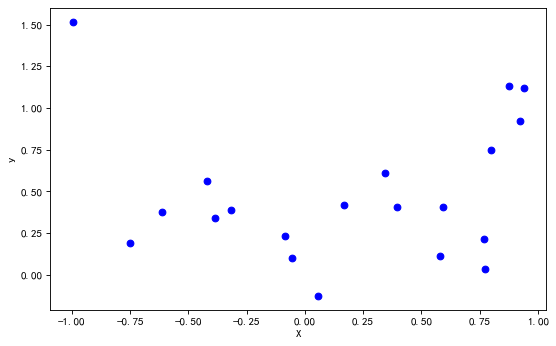

In [9]:
fig = plt.figure(figsize=(8,5),dpi=80)
plt.scatter(X_train,y_train,c="blue")
plt.xlabel("X")
plt.ylabel("y")

来看下面的实验，请关注**训练集和测试集的MSE**

----

**(1) 用一次多项式建模**

在这种情况下，我们模型的假设空间为：
$$
\mathcal{F} = \{f|y=f(x)=a_0 + a_1 x, a_0,a_1\in\mathbb{R}\}
$$

我们**在特征的基础上增加一列常数 1，然后使用前面的正规方程法，就可以求解得到最优的回归系数**

In [10]:
# 添加常数项 1
X = np.vstack([np.ones_like(X_train),X_train]).T
beta_hat_1 = NormalEquationLR(X,y_train)
# 计算训练集 mse
mse_train = np.mean((X @ beta_hat_1 - y_train)**2)
print("估计得到的系数：",beta_hat_1)

估计得到的系数： [0.47762007 0.03947136]


下面，将估计得到的系数用于预测，看看模型在测试集上的表现，评估指标使用**MSE**

训练集均方误差： 0.16528647753449588
测试集均方误差： 0.20340472191460904


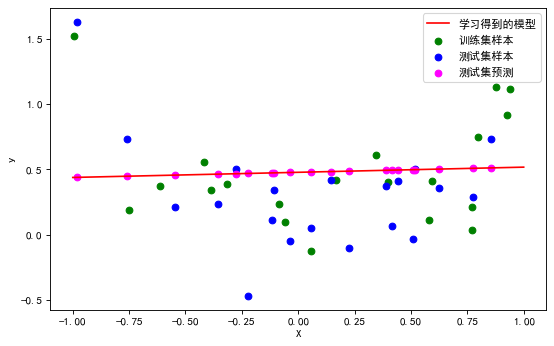

In [11]:
# 添加常数项 1
X = np.vstack([np.ones_like(X_test),X_test]).T
# 进行预测
y_hat = X @ beta_hat_1

# 计算测试集 MSE
mse_test = np.mean((y_hat - y_test)**2)
print("训练集均方误差：",mse_train)
print("测试集均方误差：",mse_test)

# 绘图
fig = plt.figure(figsize=(8,5),dpi=80)
# 采样网格，用于绘制模型
x_samples = np.linspace(-1,1,50)
y_samples = np.vstack([np.ones_like(x_samples),x_samples]).T @ beta_hat_1

plt.plot(x_samples,y_samples,c="red",label="学习得到的模型")
plt.scatter(X_train,y_train,c="green",label="训练集样本")
plt.scatter(X_test,y_test,c="blue",label="测试集样本")
plt.scatter(X_test,y_hat,c="magenta",label="测试集预测")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

一个简单的模型可能会出现**欠拟合**的问题，此时训练集和测试集的MSE都偏大，**泛化误差主要来自 $bias^2(x)$ 一项**

**(2) 用二次多项式建模**

在这种情况下，我们模型的假设空间为：
$$
\mathcal{F} = \{f|y=f(x)=a_0 + a_1 x + a_2x^2, a_0,a_1,a_2\in\mathbb{R}\}
$$

**参数增加，往往代表模型变得复杂，相应的学习能力也会更强，参数数量是可以作为衡量模型复杂程度的一个指标**

其他流程与上文相同，这里不做过多叙述

In [12]:
# 添加常数项 1 和平方项
X = np.vstack([np.ones_like(X_train),X_train,X_train**2]).T
beta_hat_2 = NormalEquationLR(X,y_train)
# 计算训练集 mse
mse_train = np.mean((X @ beta_hat_2 - y_train)**2)
print("估计得到的系数：",beta_hat_2)

估计得到的系数： [ 0.14109464 -0.09905675  0.93921316]


训练集均方误差： 0.08213495567510597
测试集均方误差： 0.0715486869489338


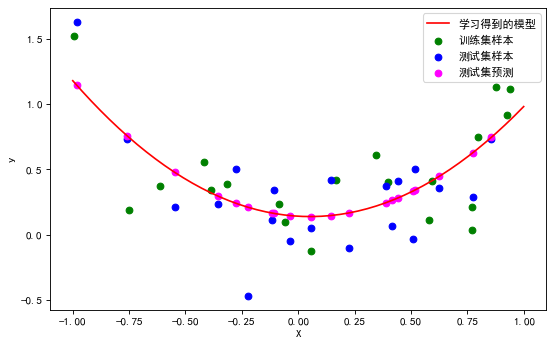

In [13]:
# 添加常数项 1 和平方项
X = np.vstack([np.ones_like(X_test),X_test,X_test**2]).T
# 进行预测
y_hat = X @ beta_hat_2

# 计算 MSE
mse_test = np.mean((y_hat - y_test)**2)
print("训练集均方误差：",mse_train)
print("测试集均方误差：",mse_test)

# 绘图
fig = plt.figure(figsize=(8,5),dpi=80)
# 采样网格，用于绘制模型
x_samples = np.linspace(-1,1,50)
y_samples = np.vstack([np.ones_like(x_samples),x_samples,x_samples**2]).T @ beta_hat_2

plt.plot(x_samples,y_samples,c="red",label="学习得到的模型")
plt.scatter(X_train,y_train,c="green",label="训练集样本")
plt.scatter(X_test,y_test,c="blue",label="测试集样本")
plt.scatter(X_test,y_hat,c="magenta",label="测试集预测")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

从**MSE**可以看到，**模型的泛化误差大幅减小**，训练集和测试集的MSE都明显减小，**偏差-方差取得平衡**

**(3) 用10次多项式建模**

在这种情况下，我们模型的假设空间为：
$$
\mathcal{F} = \{f|y=f(x)=a_0 + a_1 x + a_2x^2 + \cdots + a_{10}x^{10}, a_0,a_1,\cdots,a_{10}\in\mathbb{R}\}
$$

**参数增加，模型的复杂度进一步提高，学习能力更强**，但这容易出现**过拟合**问题

In [14]:
# 添加常数项 1 和其他高阶项
X = np.vstack([np.ones_like(X_train)] + [X_train**i for i in range(1,11)]).T
beta_hat_3 = NormalEquationLR(X,y_train)
# 计算训练集 mse
mse_train = np.mean((X @ beta_hat_3 - y_train)**2)
print("估计得到的系数：",beta_hat_3)

估计得到的系数： [ 8.15111508e-02 -2.95394516e-02  5.75681298e+00  4.92370010e+00
 -2.25886045e+01 -3.40674801e+01  1.87275111e+01  6.72761409e+01
  1.76984686e+01 -3.93322360e+01 -1.93055438e+01]


训练集均方误差： 0.020983842853445504
测试集均方误差： 0.10214825224131618


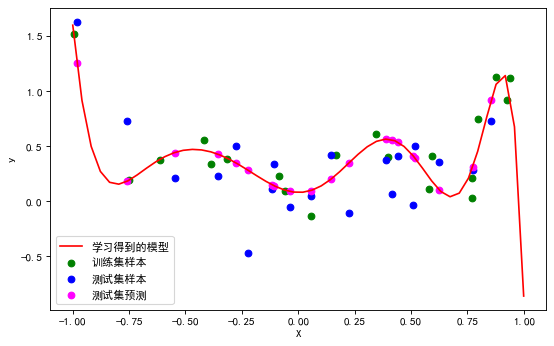

In [15]:
# 添加常数项 1 和平方项
X = np.vstack([np.ones_like(X_test)] + [X_test**i for i in range(1,11)]).T
# 进行预测
y_hat = X @ beta_hat_3

# 计算 MSE
mse_test = np.mean((y_hat - y_test)**2)
print("训练集均方误差：",mse_train)
print("测试集均方误差：",mse_test)

# 绘图
fig = plt.figure(figsize=(8,5),dpi=80)
# 采样网格，用于绘制模型
x_samples = np.linspace(-1,1,50)
y_samples = np.vstack([np.ones_like(x_samples)] + [x_samples**i for i in range(1,11)]).T @ beta_hat_3

plt.plot(x_samples,y_samples,c="red",label="学习得到的模型")
plt.scatter(X_train,y_train,c="green",label="训练集样本")
plt.scatter(X_test,y_test,c="blue",label="测试集样本")
plt.scatter(X_test,y_hat,c="magenta",label="测试集预测")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

在**过拟合**情况下，模型的**泛化误差主要来自于$var(x)$一项**，此时**训练集MSE非常小，但测试集MSE非常大**

----

我们来总结一下**欠拟合**和**过拟合**：
* 当**模型过于简单**时，模型**拟合能力差**，无法掌握有效的知识，此时**欠拟合**，泛化误差中 $bias^2(x)$ 占主导
* 当**模型过于复杂**时，模型**拟合能力过强**，容易“学偏了”，就像考试前**背模拟考的答案**，此时**过拟合**，泛化误差中 $var(x)$ 占主导
* 一个好的模型，需要**在偏差和方差中找到平衡**

用一个图形象的表示上述过程，横轴代表**模型复杂度**，纵轴表示**模型评估指标**，则：

<img src="./source/Chap1/欠拟合和过拟合.png" style="width: 500px" align="left"/>

最后，我们简单讨论一下**偏差-方差分解公式**中的系统误差（噪声）部分 $\varepsilon^2$，仍然以上面的多项式回归例子，如果我们设定：
$$
\varepsilon \sim N(0,5^2)
$$

生成的数据效果将如下所示：

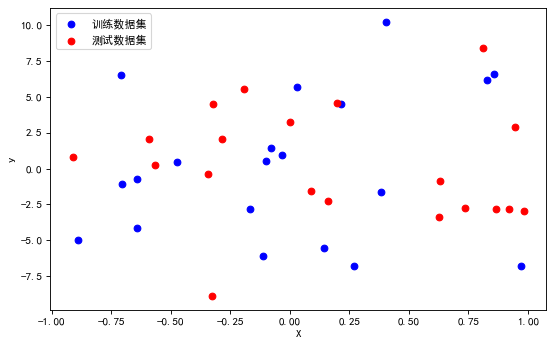

In [16]:
# 调用函数，生成训练集和测试集，设置噪声标准差为 5
X_train, y_train, X_test, y_test = GenerateData(sigma=5)

# 绘图
fig = plt.figure(figsize=(8,5),dpi=80)
plt.scatter(X_train,y_train,c="blue",label="训练数据集")
plt.scatter(X_test,y_test,c="red",label="测试数据集")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

此时数据**杂乱无章**，用**任何模型都无法学习到有效的知识**，因此，**噪声项 $\varepsilon^2$ 可以用来衡量机器学习问题的难度**

关于**模型选择**，以及欠拟合、过拟合的判断，还有**如何解决欠拟合和过拟合**的问题，属于**模型诊断**的内容，我们将在后面的课程中继续深入讨论

### **4.4 “没有免费的午餐”**

学习机器学习，需要牢记以下几点：
* 学习机器学习方法的目的是为了了解**算法的原理**和**适用范围**
* 理论上，**没有一致最优的算法**
* **脱离实际情况，空谈哪个算法好是没有意义的**
* 要学会针对具体问题，分析和比较不同的机器学习算法

----

## **练习**

1. 尝试举出一些分类、回归、有监督、无监督机器学习任务的例子

2. 假设一维随机变量 $X\sim F(x)$，$F(x)$ 是分布函数，考虑下面的问题：

(1) 考虑平方损失函数 $L_2(t) = t^2$，证明：
$$
\mathbb{E}[X] = \mathop{\arg\min}\limits_{\theta\in\mathbb{R}} \mathbb{E}\left[ L_2\left(X-\theta\right)\right]
$$

(2) 考虑分位数损失函数 $L_\tau(t) = t\cdot (\tau - \mathbb{I}\{t \leq 0\})$，其中，$\tau\in (0,1)$，证明：
$$
m_\tau = \mathop{\arg\min}\limits_{\theta\in\mathbb{R}} \mathbb{E}\left[ L_\tau\left(X-\theta\right)\right]
$$
其中，$m_\tau$ 表示 $X$ 的 $\tau-$ 分位数，即 $P(X\leq m_\tau) = \tau$

(3) 给出(1)，以及(2)中 $\tau = 0.5$ 时定理结果的直观解释

3. (**编程练习**) 在线性回归问题中，人们提出了一种**缓解过拟合**的方法，即对回归系数的大小做“惩罚”，具体来说，在原有线性回归模型框架的基础上，修改模型的**损失函数**为：
$$
\ell(\beta) = R_{emp}(f_\beta) = \frac{1}{N} \sum_{i=1}^{N} \left[ y_i - f_\beta(x_i) \right]^2 + \lambda\cdot \|\beta\|_2^2 = \frac{1}{N} \sum_{i=1}^{N} \left[ y_i - f_\beta(x_i) \right]^2 + \lambda\cdot \sum_{k=1}^{p} \beta_k^2
$$

即在原有损失函数的基础上，加上**回归系数的二范数的平方**，参数 $\lambda$ 用于控制"惩罚力度"，可以人为设定，上述方法称为**Ridge回归**或者**岭回归**

可以发现，当 $\lambda = 0$ 时，**Ridge回归**退化为一般的线性回归

(1) 推导求解**Ridge回归**模型的算法，分别从**正规方程法**的角度，和利用**梯度下降法**给出方案

(2) 编写代码，定义两个函数 `NormalEquationRidge()` 和 `GradientDescentRidge()` 实现上面的两种算法用于求解**Ridge回归**

In [17]:
def NormalEquationRidge(X : np.ndarray, y : np.ndarray, _lambda : float) -> np.ndarray:
    """
    用正规方程法求解Ridge回归
    
    Parameters
    ----------
    X : np.ndarray
        输入数据，即特征，维度`(N,p)`
    y : np.ndarray
        真实标签，即预测值，维度`(N,)`
    _lambda : float
        Ridge对参数的惩罚系数
    
    Return
    ----------
    beta : np.ndarray
        线性回归模型估计得到的最优回归系数，维度`(p,)`
    """
    
    # 在下面编写函数的逻辑
    ...

In [18]:
def GradientDescentRidge(X : np.ndarray, y : np.ndarray, 
                         _lambda : float, lr : float=0.1) -> np.ndarray:
    """
    用梯度下降法法求解Ridge回归
    
    Parameters
    ----------
    X : np.ndarray
        输入数据，即特征，维度`(N,p)`
    y : np.ndarray
        真实标签，即预测值，维度`(N,)`
    _lambda : float
        Ridge对参数的惩罚系数
    lr : float, optional
        梯度下降的学习率，默认值为`0.1`
    
    Return
    ----------
    beta : np.ndarray
        线性回归模型估计得到的最优回归系数，维度`(p,)`
    """
    
    # 在下面编写函数的逻辑
    ...

(3) 设总体空间 $X$ 来自于 $p$ 维多元正态分布 $N(\boldsymbol{\mu},\boldsymbol{\Sigma})$，出于简化的考虑，我们考虑：
* $p = 10$
* 均值向量 $\boldsymbol{\mu}$ 是零向量
* 协方差矩阵 $\boldsymbol{\Sigma}$ 是单位矩阵

取真实向量 $\beta\in\mathbb{R}^{p}$ 为：
$$
\beta^T = \left[
\begin{array}{cccccccccc}
1 & 1 & -1 & -1 & 0.5 & -0.5 & 0 & 0 & 0 & 0
\end{array}
\right]
$$

采集到的标签 $y$ 满足下面的线性回归模型：
$$
y = x\beta + \varepsilon,\quad \varepsilon\sim N(0,\sigma^2)
$$
在该问题中，我们取$\sigma = 1$

完成下面的任务：
* 利用`numpy`的相关函数，定义函数`DataGenerator()`生成上述数据，其中训练集样本20个，测试集样本50个
* 去惩罚系数 $\lambda = 1$，汇报模型估计得到的系数，以及其在训练集和测试集上的**MSE**，你认为出现欠拟合和过拟合了吗？
* 利用循环语句，设定 $\lambda=k, k=0,1,2,\cdots,100$，记录每个惩罚参数 $\lambda$ 下模型在训练集和测试集上的**MSE**，绘制两个**MSE**随 $\lambda$ 变化的曲线，绘图可以借助 `matplotlib` 包，尝试理解MSE曲线变化的含义
* 根据上面的结果，谈谈 $\lambda$ 的设置对模型欠拟合和和过拟合的影响，在你生成的数据中，最优的 $\lambda$ 大概是多少？

In [19]:
def DataGenerator(sigma : float=1):
    """
    训练集和测试集生成函数
    
    Patameters
    ----------
    sigma : float, optional
        噪声的方差，默认值为`0.1`
    
    (X_train, y_train, X_test, y_test) : tuple
        返回生成的训练特征、训练标签、测试特征、测试标签
    """
    
    # 在下面编写你的代码
    ...

Ridge回归方法在第三方软件包`sklearn`中，已经有了很好的实现，可以通过下面的方法使用

```python
# 导入线性回归模块
from sklearn.linear_model import Ridge

# 初始化模型，设定惩罚系数
model = Ridge(alpha=1, fit_intercept=False)
# 训练模型
model.fit(X_train,y_train)

# 进行预测
y_hat = model.predict(X_test)
```

具体的使用文档参见：[Ridge()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge)

---